In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

data = pd.read_csv("C:/Users/Owner/OneDrive/Desktop/data science assingment/assingment 08/crime_data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


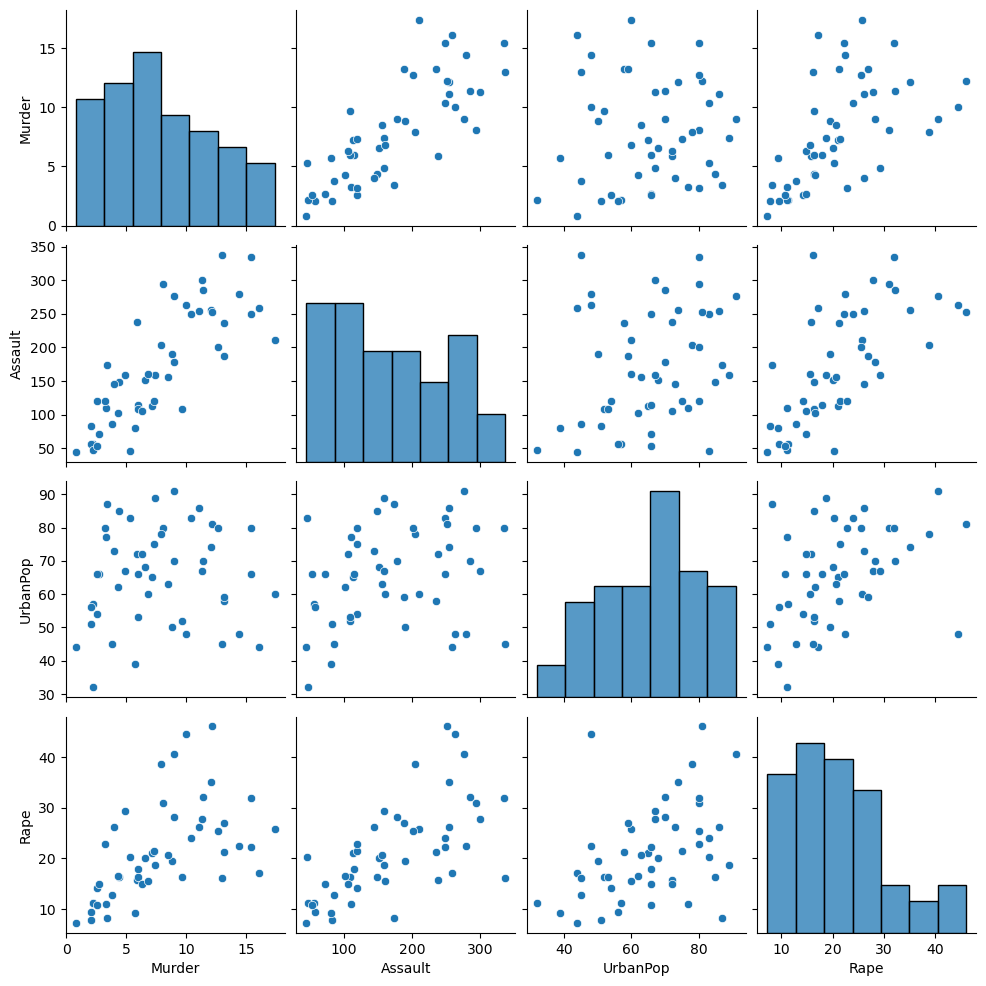

In [16]:
print(data.info())
print(data.describe())

sns.pairplot(data)
plt.show()

In [24]:
numeric_data = data.iloc[:, 1:]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

D:\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


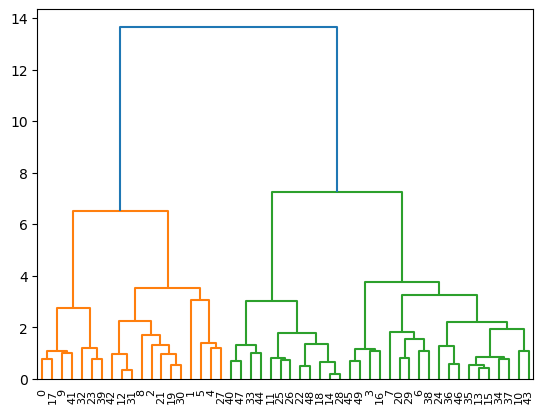

Hierarchical_Cluster
0    19
1    19
2    12
Name: count, dtype: int64


In [25]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
data['Hierarchical_Cluster'] = hc.fit_predict(data_scaled)

linkage_matrix = linkage(data_scaled, 'ward')
dendrogram(linkage_matrix)
plt.show()

print(data['Hierarchical_Cluster'].value_counts())

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

print(kmeans.cluster_centers_)

print(data['KMeans_Cluster'].value_counts())

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[-0.49440658 -0.3864845   0.58167593 -0.26431024]
 [ 1.01513667  1.02412028  0.19959126  0.85556386]
 [-0.88515915 -1.0213324  -0.94990286 -0.92016524]]
KMeans_Cluster
1    20
0    16
2    14
Name: count, dtype: int64


In [27]:
dbscan = DBSCAN(eps=1, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

print("Number of clusters (excluding outliers):", len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0))

print(data['DBSCAN_Cluster'].value_counts())

Number of clusters (excluding outliers): 2
DBSCAN_Cluster
 0    24
-1    23
 1     3
Name: count, dtype: int64


In [44]:
file_path = r"C:\Users\Owner\OneDrive\Desktop\data science assingment\clustering\EastWestAirlines.xlsx"
data_df = pd.read_excel(file_path, skiprows=4)


print(data_df.head())


print(data_df.isnull().sum())


print(data_df.describe())



                                          Unnamed: 0 Unnamed: 1  \
0  Source: Based upon real business data; company...        NaN   
1             (c) 2016 Galit Shmueli and Peter Bruce        NaN   
2                                                NaN        NaN   
3                                                NaN        NaN   
4                                         Field Name  Data Type   

        Unnamed: 2                         Unnamed: 3   Unnamed: 4  
0              NaN                                NaN          NaN  
1              NaN                                NaN          NaN  
2              NaN                                NaN          NaN  
3              NaN                                NaN          NaN  
4  Max Data Length  Raw Data or Telcom Created Field?  Description  
Unnamed: 0     6
Unnamed: 1     9
Unnamed: 2    16
Unnamed: 3     9
Unnamed: 4     4
dtype: int64
                                               Unnamed: 0 Unnamed: 1  \
count        